#Trying Topic Modelling using LDA

In [26]:
from google.colab import files
papers = files.upload()

Saving df_text.csv to df_text (2).csv


In [27]:
import io
import pandas as pd

filename = next(iter(papers))
df = pd.read_csv(io.BytesIO(papers[filename]))

#Loading the df and checking if it has loaded properly
print(df.head())

   Unnamed: 0                                    content.stemmed
0           1  parlamentti jatkua nähtävästi mennä täysi vauh...
1           2  painaa korkea kirjaima sos.dem pää-äänenkannai...
2           3  aattei tämä päteä ranskalainen viisaus opposit...
3           4  valllankumous asia tieto muistaa gylling julis...
4           5  kokonainen ekosysteemi muutos muistaa mittari ...


In [28]:
papers = df.dropna(subset=['content.stemmed'])

In [29]:
papers.head()

,Unnamed: 0,content.stemmed
0,1,parlamentti jatkua nähtävästi mennä täysi vauh...
1,2,painaa korkea kirjaima sos.dem pää-äänenkannai...
2,3,aattei tämä päteä ranskalainen viisaus opposit...
3,4,valllankumous asia tieto muistaa gylling julis...
4,5,kokonainen ekosysteemi muutos muistaa mittari ...


In [30]:
papers = papers['content.stemmed']

In [31]:
papers.head()

0    parlamentti jatkua nähtävästi mennä täysi vauh...
1    painaa korkea kirjaima sos.dem pää-äänenkannai...
2    aattei tämä päteä ranskalainen viisaus opposit...
3    valllankumous asia tieto muistaa gylling julis...
4    kokonainen ekosysteemi muutos muistaa mittari ...
Name: content.stemmed, dtype: object

## Creating a Wordcloud

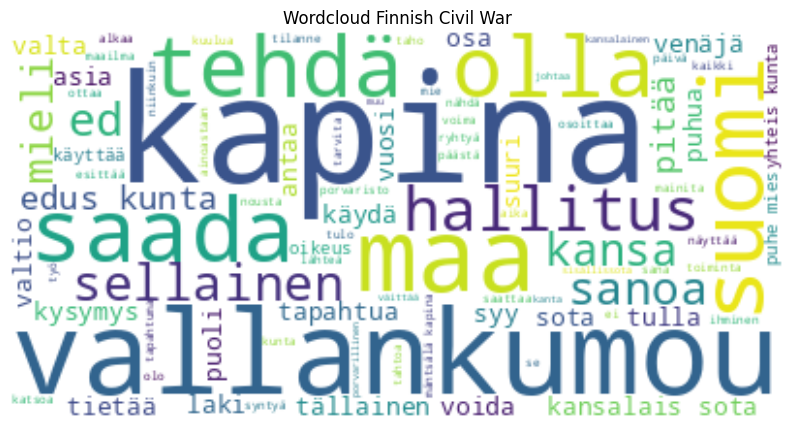

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# checking if papers is a Series and drop any NaN values
long_string = ','.join(papers.dropna().values)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

# Display
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Finnish Civil War')
plt.axis('off')
plt.show()


In [34]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords') # not required since Mahdi already removed them and performed lemmatization as well!
from nltk.corpus import stopwords # not required since Mahdi already removed them and performed lemmatization as well!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
#Checking structure.
for entry in papers.head():
    print(type(entry), entry)


<class 'str'> parlamentti jatkua nähtävästi mennä täysi vauhti marxilaispuolue vetää mennä käänne v nurja puoli nimittäin punainen kapina sisällöltänsä sellainen kajo mielellä hallitus aloite tuoda rikkomuksinen esitys pakko palata raskas rikos yksikään vapautta kunnioittaa maa sellainen tekijä armahtaa teko sitäpaitsi katua valitaa kapina onnistua erehdys valio#kunta luonnollisesti tutkia millainen herra tokoin aseellinen toiminta muurmanni kohtalokkkaasti vaikuttaa m
<class 'str'> painaa korkea kirjaima sos.dem pää-äänenkannaitaja etusivu ylistys sveita sotaväki siirtyä kansa tahtoa sanoa kapinallinen puoli ed aaltonen entäs suomi mäntsälä kapina tä voida tapahtua luotettava maa puolustusväki siitä vasen sellainen viha maanpuolustus huomata
<class 'str'> aattei tämä päteä ranskalainen viisaus oppositio käyttäytyä valta päästä päinvastoin oppositio olla vaatia maassa tapahtua tietynlainen vallankumous kokoomus kenttä seurata pelonsekaisin tuntea mielenkiinto kokoomus toiminta kokoomus

In [38]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.2 MB/s eta 0:00:00


In [40]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Updated import for the latest pyLDAvis version
import pickle
import os

# String in the Series to a list of words
data_words = [entry.split() for entry in papers.dropna()]
id2word = corpora.Dictionary(data_words)

# List of term-document frequency
corpus = [id2word.doc2bow(text) for text in data_words]


# Setting topics
num_topics = 10

# Build LDA model using LdaMulticore
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



# Creating viz saving directory to make so we can access the results later in .html format
os.makedirs('./results/', exist_ok=True)

# Visualizing the topics
pyLDAvis.enable_notebook()

# defining saving path
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

# Creating and saving the viz
if not os.path.exists(LDAvis_data_filepath):
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

html_path = './results/ldavis_prepared_' + str(num_topics) + '.html'
pyLDAvis.save_html(LDAvis_prepared, html_path)

# View
LDAvis_prepared


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"vallankumous" + 0.013*"kapina" + 0.009*"maa" + 0.007*"olla" + '
  '0.007*"saada" + 0.006*"sanoa" + 0.006*"suomi" + 0.005*"mieli" + '
  '0.004*"kansa" + 0.004*"sellainen"'),
 (1,
  '0.030*"vallankumous" + 0.014*"kapina" + 0.007*"tapahtua" + 0.007*"suomi" + '
  '0.007*"venäjä" + 0.007*"maa" + 0.006*"tehdä" + 0.006*"ed" + '
  '0.005*"hallitus" + 0.004*"sanoa"'),
 (2,
  '0.021*"kapina" + 0.010*"vallankumous" + 0.007*"tapahtua" + 0.006*"tehdä" + '
  '0.006*"sellainen" + 0.005*"maa" + 0.005*"saada" + 0.005*"hallitus" + '
  '0.005*"sanoa" + 0.005*"suomi"'),
 (3,
  '0.012*"kapina" + 0.011*"vallankumous" + 0.008*"maa" + 0.008*"suomi" + '
  '0.007*"tehdä" + 0.007*"ed" + 0.007*"olla" + 0.006*"tapahtua" + '
  '0.006*"mieli" + 0.005*"kansalais#sota"'),
 (4,
  '0.017*"vallankumous" + 0.012*"kapina" + 0.006*"olla" + 0.006*"suomi" + '
  '0.005*"sanoa" + 0.005*"maa" + 0.004*"n" + 0.004*"saada" + 0.004*"hallitus" '
  '+ 0.004*"laki"'),
 (5,
  '0.019*"kapina" + 0.007*"olla" + 0.006*"suomi"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.021388  0.008715       1        1  19.109172
9     -0.021247 -0.005840       2        1  13.684390
4     -0.041469 -0.008045       3        1  12.381565
0     -0.033945 -0.041121       4        1   9.566251
6      0.073370 -0.057257       5        1   8.723418
5     -0.005251 -0.008537       6        1   8.700617
8      0.008534 -0.009138       7        1   7.838278
3      0.046600  0.055182       8        1   7.785657
1     -0.009619  0.021104       9        1   6.887154
2      0.004416  0.044936      10        1   5.323499, topic_info=             Term         Freq        Total Category  logprob  loglift
103  vallankumous   719.000000   719.000000  Default  30.0000  30.0000
9          kapina  1003.000000  1003.000000  Default  29.0000  29.0000
16            maa   329.000000   329.000000  Default  28.0000  28.0000
72          suomi   318.000000   318.000000  Default  27.0000  27.0000
57          kansa   206.000000   206.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
6           herra     5.034627    73.756435  Topic10  -6.2879   0.2486
67          sanoa     6.365641   188.056819  Topic10  -6.0533  -0.4528
873         pitää     5.783297   155.225983  Topic10  -6.1493  -0.3569
630         mieli     5.741884   154.563993  Topic10  -6.1565  -0.3598
442    edus#kunta     5.497385   150.047252  Topic10  -6.2000  -0.3736

[813 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
2267       1  0.674249               .
5774       8  0.438004       1930#luku
785        1  0.147529            aate
785        2  0.590117            aate
785        3  0.147529            aate
...      ...       ...             ...
2308       4  0.422994      yhteistyö-
11903      9  0.453583  yksituumaisuut
3544       2  0.783976   ymmärtämättöa
5686       5  0.850574  yritteliäisyys
2309       4  0.847732        ystävyys

[1978 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 5, 1, 7, 6, 9, 4, 2, 3])

In [41]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Updated import for the latest pyLDAvis version
import pickle
import os

# String in the Series to a list of words
data_words = [entry.split() for entry in papers.dropna()]
id2word = corpora.Dictionary(data_words)

# List of term-document frequency
corpus = [id2word.doc2bow(text) for text in data_words]


# Setting topics
num_topics = 5

# Build LDA model using LdaMulticore
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



# Creating viz saving directory to make so we can access the results later in .html format
os.makedirs('./results/', exist_ok=True)

# Visualizing the topics
pyLDAvis.enable_notebook()

# defining saving path
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

# Creating and saving the viz
if not os.path.exists(LDAvis_data_filepath):
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

html_path = './results/ldavis_prepared_' + str(num_topics) + '.html'
pyLDAvis.save_html(LDAvis_prepared, html_path)

# View
LDAvis_prepared


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"kapina" + 0.015*"vallankumous" + 0.009*"maa" + 0.008*"ed" + '
  '0.007*"olla" + 0.006*"tapahtua" + 0.006*"hallitus" + 0.006*"saada" + '
  '0.005*"tehdä" + 0.005*"sanoa"'),
 (1,
  '0.023*"kapina" + 0.012*"vallankumous" + 0.007*"saada" + 0.006*"venäjä" + '
  '0.005*"hallitus" + 0.004*"kansa" + 0.004*"maa" + 0.004*"sellainen" + '
  '0.004*"suomi" + 0.003*"olla"'),
 (2,
  '0.020*"kapina" + 0.017*"vallankumous" + 0.011*"suomi" + 0.007*"tehdä" + '
  '0.007*"maa" + 0.006*"kansa" + 0.006*"hallitus" + 0.006*"sellainen" + '
  '0.005*"ed" + 0.005*"saada"'),
 (3,
  '0.013*"vallankumous" + 0.012*"kapina" + 0.006*"suomi" + 0.006*"olla" + '
  '0.006*"maa" + 0.005*"saada" + 0.004*"sota" + 0.003*"tapahtua" + '
  '0.003*"tehdä" + 0.003*"kansa"'),
 (4,
  '0.019*"kapina" + 0.009*"vallankumous" + 0.008*"tehdä" + 0.006*"sanoa" + '
  '0.006*"saada" + 0.005*"ed" + 0.005*"sellainen" + 0.005*"suomi" + '
  '0.005*"maa" + 0.004*"olla"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.035924  0.027055       1        1  33.884986
2     -0.023669 -0.023949       2        1  30.148990
1      0.009706 -0.031580       3        1  14.407279
4      0.030444  0.014360       4        1  11.468774
3      0.019442  0.014114       5        1  10.089972, topic_info=               Term         Freq        Total Category  logprob  loglift
9            kapina  1001.000000  1001.000000  Default  30.0000  30.0000
103    vallankumous   732.000000   732.000000  Default  29.0000  29.0000
388           tehdä   278.000000   278.000000  Default  28.0000  28.0000
172           saada   288.000000   288.000000  Default  27.0000  27.0000
72            suomi   331.000000   331.000000  Default  26.0000  26.0000
..              ...          ...          ...      ...      ...      ...
53               ed    15.815541   293.369578   Topic5  -5.7827  -0.6268
873           pitää    11.270821   160.274596   Topic5  -6.1215  -0.3610
467  kansalais#sota    10.167397   125.369106   Topic5  -6.2245  -0.2184
79            voida    10.166137   134.768197   Topic5  -6.2246  -0.2909
412             syy     9.007272   114.075527   Topic5  -6.3456  -0.2452

[431 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2071      1  0.770733            <
9625      3  0.448767   abolitiona
5858      5  0.517123     ahtaamma
4667      2  0.766950  aikaansaada
8191      5  0.520312     akatemia
...     ...       ...          ...
536       1  0.364124       yritys
536       2  0.198613       yritys
536       3  0.264817       yritys
536       4  0.099307       yritys
536       5  0.066204       yritys

[798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

In [42]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Updated import for the latest pyLDAvis version
import pickle
import os

# String in the Series to a list of words
data_words = [entry.split() for entry in papers.dropna()]
id2word = corpora.Dictionary(data_words)

# List of term-document frequency
corpus = [id2word.doc2bow(text) for text in data_words]


# Setting topics
num_topics = 4

# Build LDA model using LdaMulticore
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



# Creating viz saving directory to make so we can access the results later in .html format
os.makedirs('./results/', exist_ok=True)

# Visualizing the topics
pyLDAvis.enable_notebook()

# defining saving path
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

# Creating and saving the viz
if not os.path.exists(LDAvis_data_filepath):
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

html_path = './results/ldavis_prepared_' + str(num_topics) + '.html'
pyLDAvis.save_html(LDAvis_prepared, html_path)

# View
LDAvis_prepared


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"kapina" + 0.013*"vallankumous" + 0.007*"olla" + 0.007*"suomi" + '
  '0.005*"maa" + 0.005*"kansa" + 0.005*"sota" + 0.005*"sanoa" + 0.004*"saada" '
  '+ 0.004*"venäjä"'),
 (1,
  '0.021*"kapina" + 0.014*"vallankumous" + 0.007*"tehdä" + 0.007*"suomi" + '
  '0.007*"maa" + 0.006*"ed" + 0.005*"saada" + 0.005*"olla" + 0.004*"sellainen" '
  '+ 0.004*"hallitus"'),
 (2,
  '0.018*"kapina" + 0.014*"vallankumous" + 0.008*"ed" + 0.007*"tehdä" + '
  '0.007*"hallitus" + 0.005*"olla" + 0.005*"saada" + 0.005*"kansa" + '
  '0.004*"maa" + 0.004*"suomi"'),
 (3,
  '0.020*"kapina" + 0.015*"vallankumous" + 0.009*"maa" + 0.007*"saada" + '
  '0.007*"suomi" + 0.006*"tapahtua" + 0.006*"hallitus" + 0.005*"sellainen" + '
  '0.005*"venäjä" + 0.004*"ed"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.031174 -0.011474       1        1  29.716942
1     -0.008833 -0.022814       2        1  26.726924
2     -0.027700  0.000835       3        1  22.186977
0      0.005359  0.033453       4        1  21.369157, topic_info=         Term        Freq       Total Category  logprob  loglift
176      sota  130.000000  130.000000  Default  30.0000  30.0000
388     tehdä  274.000000  274.000000  Default  29.0000  29.0000
88       olla  263.000000  263.000000  Default  28.0000  28.0000
57      kansa  203.000000  203.000000  Default  27.0000  27.0000
462    venäjä  162.000000  162.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
388     tehdä   35.191478  274.037551   Topic4  -5.7333  -0.5092
29   punainen   22.400627   92.329672   Topic4  -6.1850   0.1269
664    tietää   21.163212   90.342652   Topic4  -6.2418   0.0919
412       syy   21.664019  110.553841   Topic4  -6.2184  -0.0866
157      laki   21.720567  120.552306   Topic4  -6.2158  -0.1706

[341 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
145        1  0.252950                 $
145        2  0.126475                 $
145        3  0.221331                 $
145        4  0.379425                 $
3099       1  0.137827          ahvenana
...      ...       ...               ...
436        4  0.101637      yhteis#kunta
5157       1  0.799392  yhteiskuntaryhmä
8712       1  0.898094          yhtäkkiä
8878       2  0.826430   ylioppilaspiiri
10201      3  0.843718    äärivasemmisto

[600 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

#Based on improvements, suggestions and talking with LLMs (ChatGpt and Perplexity Chat)

In [46]:
import os
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.models import TfidfModel
from nltk.corpus import stopwords
from pprint import pprint

# Set the directory path
model_dir = 'models'

# Ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

# Assuming 'data_words_trigrams' is your list of documents where each document is a list of words
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Apply TF-IDF
tfidf = TfidfModel(corpus)  # fit model
corpus_tfidf = tfidf[corpus]  # apply model

# Set parameters for the LDA model
num_topics = 10
alpha = 'asymmetric'  # Can vary
beta = 'auto'  # Can vary

# Build LDA model with TF-IDF corpus
lda_model = LdaMulticore(corpus=corpus_tfidf, id2word=id2word, num_topics=num_topics, alpha=alpha, eta=beta)

# Print the top topics
pprint(lda_model.print_topics())

# Save the model to disk
model_path = os.path.join(model_dir, 'lda_model_tfidf.model')
lda_model.save(model_path)
print(f"Model saved to {model_path}")

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Adjust according to your pyLDAvis version
import pickle
import os

# Setup the visualization environment in a notebook
pyLDAvis.enable_notebook()

# Assuming 'lda_model' and 'corpus' and 'id2word' are already defined as per your previous code
# Generate the LDA visualization
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Display the interactive visualization inline in the notebook
pyLDAvis.display(LDAvis_prepared)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.003*"kapina" + 0.002*"vallankumous" + 0.002*"ed" + 0.002*"suomi" + '
  '0.002*"maa" + 0.002*"hallitus" + 0.002*"saada" + 0.002*"tehdä" + '
  '0.002*"sellainen" + 0.002*"olla"'),
 (1,
  '0.002*"kapina" + 0.002*"vallankumous" + 0.002*"suomi" + 0.001*"tehdä" + '
  '0.001*"hallitus" + 0.001*"voida" + 0.001*"olla" + 0.001*"sanoa" + '
  '0.001*"kansa" + 0.001*"maa"'),
 (2,
  '0.001*"vallankumous" + 0.001*"lähteä" + 0.001*"kansa" + 0.001*"venäjä" + '
  '0.001*"maa" + 0.001*"saada" + 0.001*"kapina" + 0.001*"suomi" + 0.001*"taho" '
  '+ 0.001*"jatkua"'),
 (3,
  '0.001*"somalia" + 0.001*"vallankumous" + 0.001*"tapahtua" + 0.000*"kapina" '
  '+ 0.000*"sosialistinen" + 0.000*"vuosi" + 0.000*"maa" + 0.000*"tehdä" + '
  '0.000*"paasivuori" + 0.000*"vaarallinen"'),
 (4,
  '0.001*"ymmärtää" + 0.000*"porvarillinen" + 0.000*"sota" + 0.000*"turkki" + '
  '0.000*"rautatieläinen" + 0.000*"valta" + 0.000*"hallitus" + '
  '0.000*"toimen#pide" + 0.000*"tilanne" + 0.000*"koti"'),
 (5,
  '0.000*"espan

In [47]:
import os
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.models import TfidfModel
from nltk.corpus import stopwords
from pprint import pprint

# Set the directory path
model_dir = 'models'

# Ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

# Assuming 'data_words_trigrams' is your list of documents where each document is a list of words
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Apply TF-IDF
tfidf = TfidfModel(corpus)  # fit model
corpus_tfidf = tfidf[corpus]  # apply model

# Set parameters for the LDA model
num_topics = 5
alpha = 'asymmetric'  # Can vary
beta = 'auto'  # Can vary

# Build LDA model with TF-IDF corpus
lda_model = LdaMulticore(corpus=corpus_tfidf, id2word=id2word, num_topics=num_topics, alpha=alpha, eta=beta)

# Print the top topics
pprint(lda_model.print_topics())

# Save the model to disk
model_path = os.path.join(model_dir, 'lda_model_tfidf.model')
lda_model.save(model_path)
print(f"Model saved to {model_path}")

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Adjust according to your pyLDAvis version
import pickle
import os

# Setup the visualization environment in a notebook
pyLDAvis.enable_notebook()

# Assuming 'lda_model' and 'corpus' and 'id2word' are already defined as per your previous code
# Generate the LDA visualization
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Display the interactive visualization inline in the notebook
pyLDAvis.display(LDAvis_prepared)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.003*"kapina" + 0.002*"vallankumous" + 0.002*"suomi" + 0.002*"maa" + '
  '0.002*"ed" + 0.002*"hallitus" + 0.002*"tehdä" + 0.002*"saada" + '
  '0.002*"olla" + 0.002*"kansa"'),
 (1,
  '0.001*"kapina" + 0.001*"maa" + 0.000*"ed" + 0.000*"hallitus" + 0.000*"laki" '
  '+ 0.000*"olla" + 0.000*"saada" + 0.000*"n" + 0.000*"sellainen" + '
  '0.000*"pitää"'),
 (2,
  '0.000*"hävitä" + 0.000*"keskiaste" + 0.000*"keski#aste" + '
  '0.000*"korkeakouluinen" + 0.000*"opintolaina" + 0.000*"hyötyy" + '
  '0.000*"karkeasti" + 0.000*"opintoraha" + 0.000*"määritellä" + '
  '0.000*"työmaa"'),
 (3,
  '0.000*"kukistaja" + 0.000*"miln" + 0.000*"menestyä" + 0.000*"kirjoittaa" + '
  '0.000*"jäsen" + 0.000*"muistopatsa" + 0.000*"jälkimaailma" + '
  '0.000*"hiritonuora" + 0.000*"vesterinen" + 0.000*"hävitettäinen"'),
 (4,
  '0.000*"virolainen" + 0.000*"luopua" + 0.000*"annetulla" + '
  '0.000*"yrittäisivät" + 0.000*"tosissaan" + 0.000*"selvemmä" + 0.000*"ed" + '
  '0.000*"ilma" + 0.000*"valtaenemmistö" + 0

## Tried Finnish models as well; however, did not work. Sticking to multi-lanaguage models for now




```
from voikko.libvoikko import Voikko
import gensim
import gensim.corpora as corpora

# Setup Voikko for Finnish
voikko = Voikko("fi")

# Function to preprocess text
def preprocess_finnish(texts):
    for text in texts:
        tokens = gensim.utils.simple_preprocess(text, deacc=True)
        lemmas = [voikko.analyze(token)[0]['BASEFORM'] if voikko.analyze(token) else token for token in tokens]
        yield lemmas

# Example text data
texts = ["Esimerkkitietueen käsittely suomen kielellä."]
processed_texts = list(preprocess_finnish(texts))

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_texts)
corpus = [id2word.doc2bow(text) for text in processed_texts]

# Assume lda_model setup here

# Clean up resources
voikko.terminate()
```






##  Replicating Juho's code using sklearn for TM


In [50]:
import os
import pickle
import gensim
import gensim.corpora as corpora
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

data_words = [entry.split() for entry in papers.dropna()]  # List of lists of tokens
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]
data = [' '.join(doc) for doc in data_words]  # Convert back to documents
vectorizer = CountVectorizer(analyzer='word', vocabulary=id2word.token2id)
data_vectorized = vectorizer.fit_transform(data)
lda_model = LatentDirichletAllocation(n_components=5, random_state=1) # Number of topics
lda_model.fit(data_vectorized)
def print_topics(model, vectorizer, top_n=5):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx + 1))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
               for i in topic.argsort()[:-top_n - 1:-1]])

# Display topics
print_topics(lda_model, vectorizer)

# Save the model and vectorizer
with open('lda_sklearn_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

doc_topic_distribution = lda_model.transform(data_vectorized[0])
print("Document-Topic Distribution for the first document:", doc_topic_distribution)

# Evaluate the model's log-likelihood on the given data -- INTERSTING AND IMPORTANT
log_likelihood = lda_model.score(data_vectorized)
print("Model Log Likelihood:", log_likelihood)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
[('vallankumous', 174.6209746576924), ('kapina', 96.11878377356823), ('maa', 76.29924240403295), ('kunta', 68.42188958556783), ('sota', 67.79208843559222)]
Topic 2:
[('vallankumous', 128.54726116582685), ('kapina', 88.49001355358021), ('maa', 66.98805592679587), ('kunta', 57.55509407923559), ('hallitus', 57.34286411054083)]
Topic 3:
[('kapina', 237.59874578054317), ('vallankumous', 204.76919626065722), ('hallitus', 130.37267224733466), ('valta', 117.56525644350685), ('venäjä', 105.24889975887939)]
Topic 4:
[('vallankumous', 217.69319529324204), ('sota', 175.739718934568), ('kapina', 164.44622496303296), ('ed', 107.02658726866692), ('tehdä', 70.03825786041172)]
Topic 5:
[('kapina', 659.3462319292604), ('kunta', 213.10635959552081), ('maa', 195.80676493992723), ('suomi', 175.6430302969598), ('vallankumous', 165.36937262256663)]
Document-Topic Distribution for the first document: [[0.00380586 0.00377714 0.17516463 0.81342969 0.00382268]]
Model Log Likelihood: -429186.37939943117


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


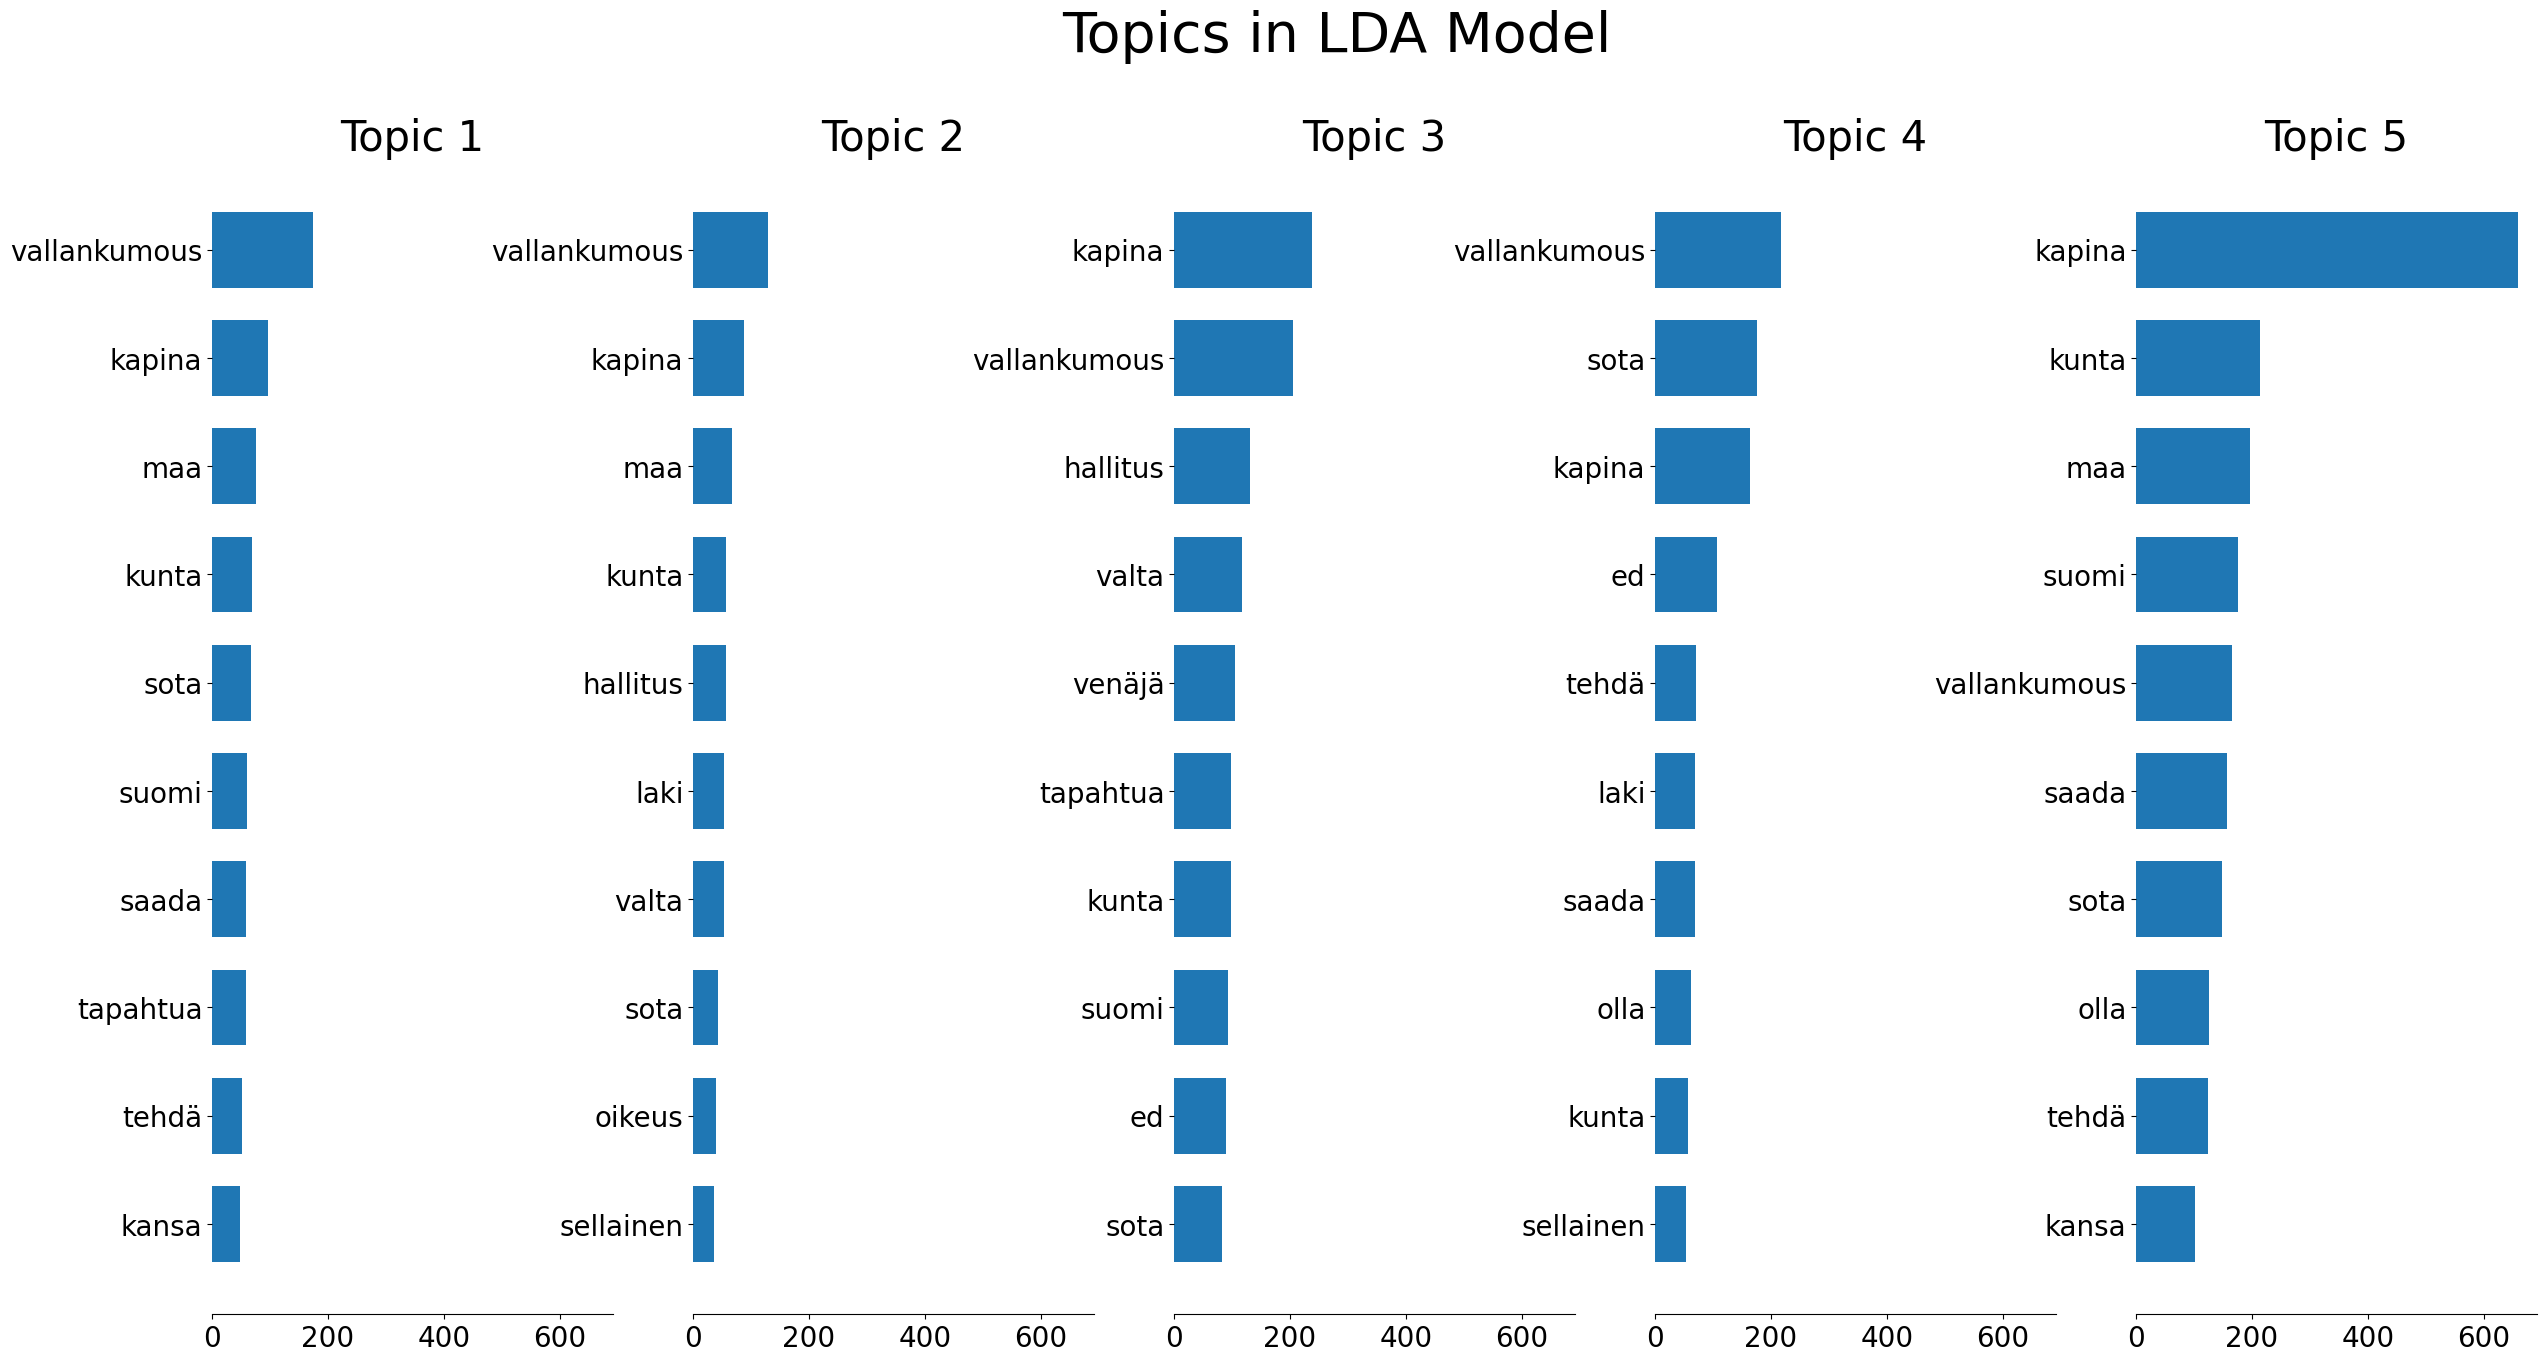

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)


    plt.show()

# Assuming `lda_model` and `vectorizer` are already defined and fitted
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda_model, feature_names, 10, 'Topics in LDA Model')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Topic 1:
[('vallankumous', 39.64360286599299), ('maa', 20.351778733561538), ('kapina', 19.775798209430064), ('sota', 19.344669878660664), ('saada', 17.642025420507277), ('kunta', 16.838952822792884), ('tehdä', 16.725898020636862), ('päivä', 13.65749775156188), ('olla', 12.273407903006406), ('tapahtua', 12.189800785762678)]
Topic 2:
[('vallankumous', 26.994376209715252), ('hallitus', 21.05000001311354), ('kapina', 17.410518904523713), ('maa', 15.34400097469332), ('laki', 14.05000000930287), ('valta', 12.69597425921665), ('rikos', 12.653990504247805), ('väki', 12.56667162251038), ('suomi', 12.3475678766376), ('tehdä', 12.090464245083295)]
Topic 3:
[('kapina', 44.30607433629488), ('vallankumous', 33.423212020678356), ('hallitus', 33.012607878900745), ('venäjä', 22.695287316684844), ('tapahtua', 20.27984022813217), ('suomi', 18.969586332676666), ('kunta', 18.54070559581269), ('valta', 17.858823251284363), ('kysymys', 16.154901769914602), ('esittää', 15.497653610250106)]
Topic 4:
[('sota', 

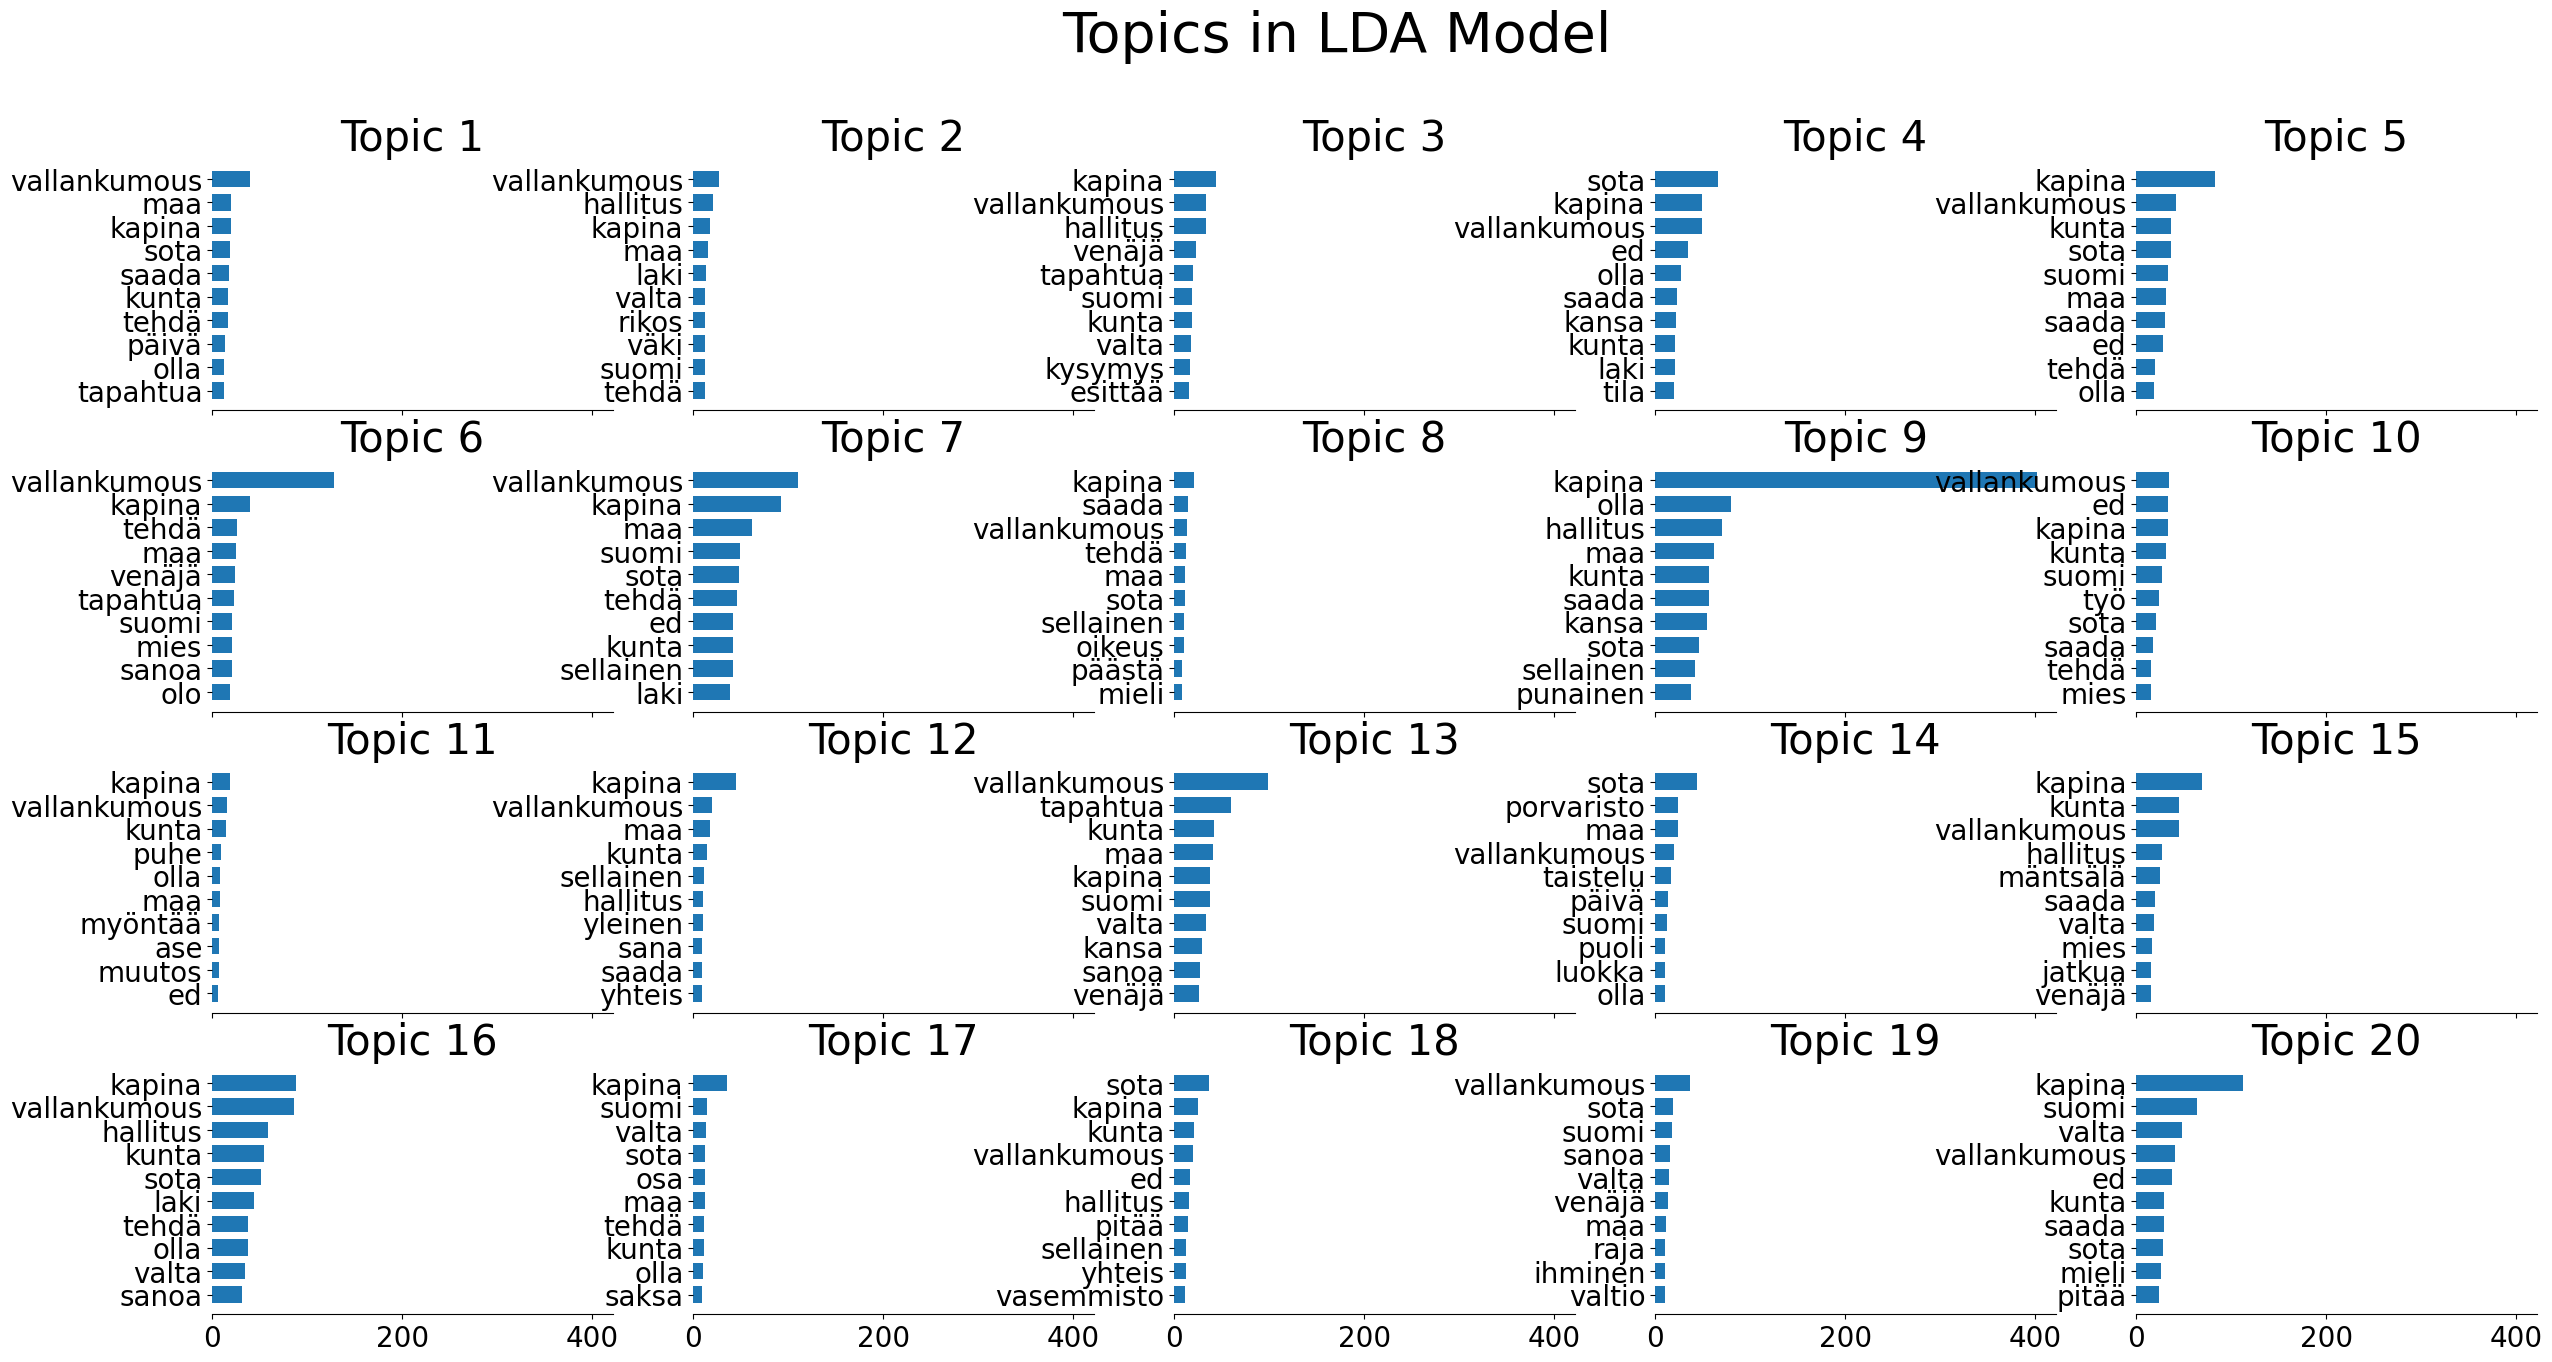

In [55]:
#trying for 20 topics
import os
import pickle
import gensim
import gensim.corpora as corpora
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

data_words = [entry.split() for entry in papers.dropna()]  # List of lists of tokens
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]
data = [' '.join(doc) for doc in data_words]  # Convert back to documents
vectorizer = CountVectorizer(analyzer='word', vocabulary=id2word.token2id)
data_vectorized = vectorizer.fit_transform(data)
lda_model = LatentDirichletAllocation(n_components=20, random_state=1) # Number of topics
lda_model.fit(data_vectorized)
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx + 1))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
               for i in topic.argsort()[:-top_n - 1:-1]])

# Display topics
print_topics(lda_model, vectorizer)

# Save the model and vectorizer
with open('lda_sklearn_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

doc_topic_distribution = lda_model.transform(data_vectorized[0])
print("Document-Topic Distribution for the first document:", doc_topic_distribution)

# Evaluate the model's log-likelihood on the given data -- INTERSTING AND IMPORTANT
log_likelihood = lda_model.score(data_vectorized)
print("Model Log Likelihood:", log_likelihood)


import matplotlib.pyplot as plt
import numpy as np

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)


    plt.show()

# Assuming `lda_model` and `vectorizer` are already defined and fitted
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda_model, feature_names, 10, 'Topics in LDA Model')


# Trying Collocation Networks

In [56]:
texts = papers.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess(text):
    lower = text.lower()  # Convert to lowercase
    no_punctuation = lower.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(no_punctuation)  # Tokenize
    return tokens

# Apply preprocessing
tokens_list = [preprocess(text) for text in texts]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Bigram measures and finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(tokens_list)

# Apply frequency and MI filters
finder.apply_freq_filter(8)  # Frequency of bigrams should be at least 8
scored = finder.score_ngrams(bigram_measures.pmi)  # Score bigrams using Pointwise Mutual Information

# Filter bigrams with MI >= 5
filtered_bigrams = [bigram for bigram, score in scored if score >= 5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
import math

def log_dice(bigram):
    o11 = finder.ngram_fd[bigram]  # Frequency of the bigram
    r1 = sum(finder.word_fd[word] for word in bigram)  # Sum of frequencies of the words
    c1 = len(texts)  # Total number of documents (you may adjust this based on your context)
    log_dice_value = 14 + math.log2((2 * o11) / (r1 * c1))
    return log_dice_value

# Applying Log Dice filter (≥ 6)
final_bigrams = [(bigram, log_dice(bigram)) for bigram in filtered_bigrams if log_dice(bigram) >= 6 or math.isnan(log_dice(bigram))]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
for bigram, score in final_bigrams:
    print(bigram, score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


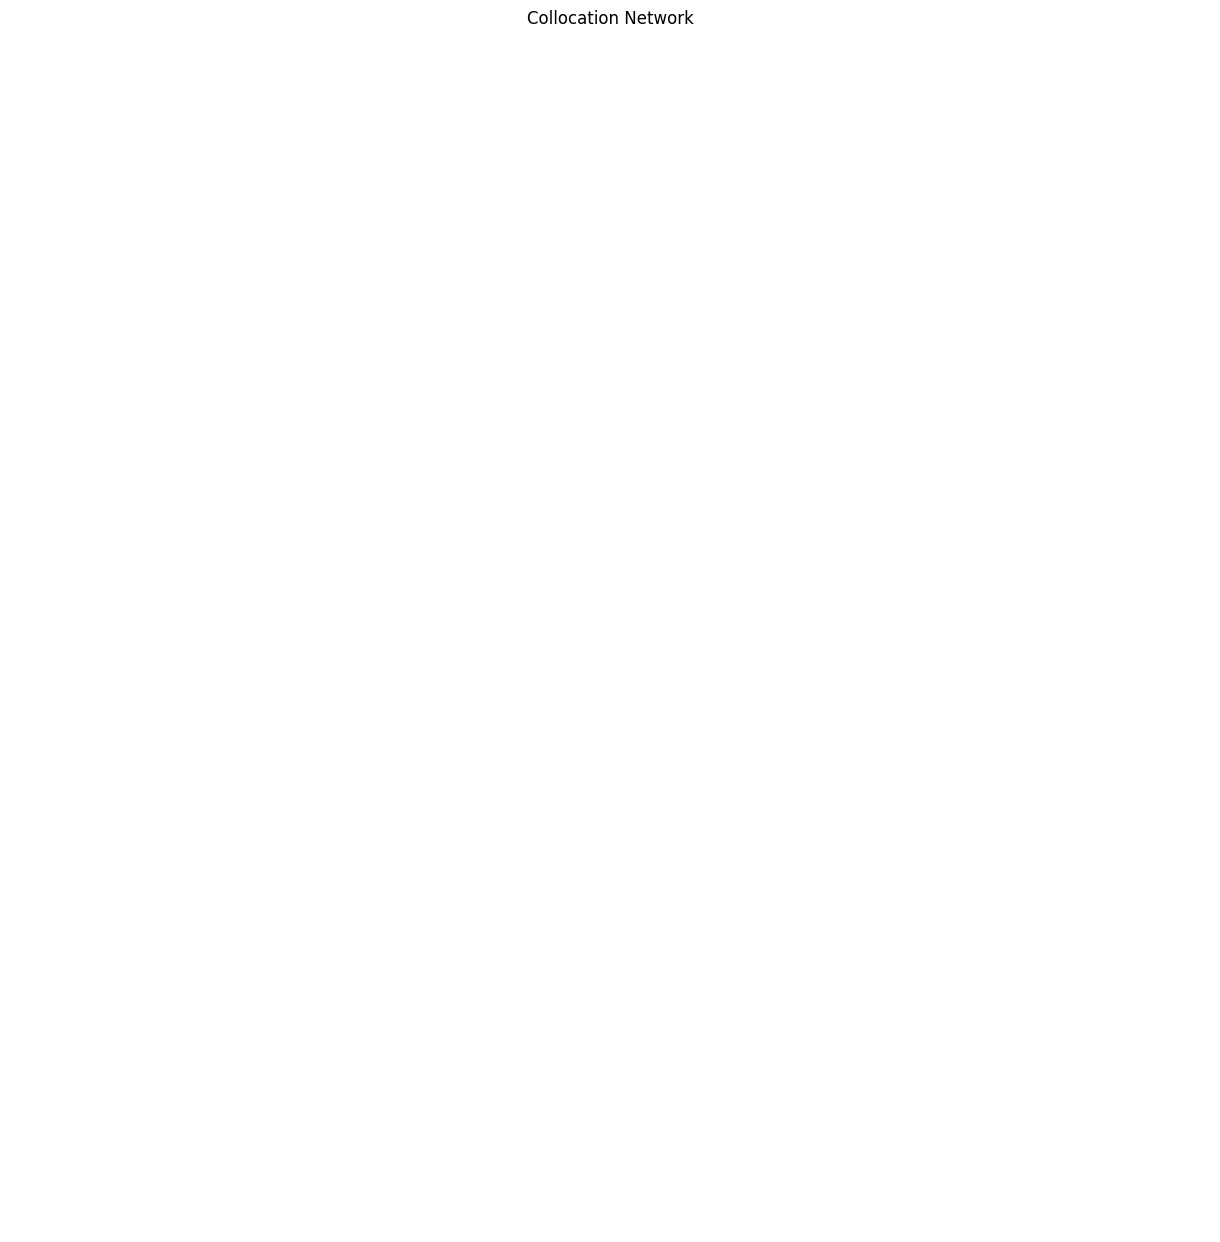

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes and edges from the collocations list
# Assuming 'final_bigrams' is a list of tuples from the previous example
for bigram, score in final_bigrams:
    word1, word2 = bigram
    # Adding nodes and edges with weights based on some criteria (e.g., Log Dice score)
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2, weight=score)

# Position nodes using one of the layout algorithms
pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes

# Draw the network
plt.figure(figsize=(12, 12))  # Set the size of the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', linewidths=1, font_size=15)

# Draw edge labels (optional, to see the weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title('Collocation Network')
plt.show()
